In [ ]:
# /home/mehul/asd_graph/baselines/outputs/2023-09-06/13-01-25/train_node_attn
# /A_epoch_0_inter_45.npy

In [5]:
import numpy as np

In [1]:
import numpy as np


def softmax(x):
    """Compute softmax values along the second dimension of x."""
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True)
                 )  # Subtracting max for numerical stability
    return e_x / e_x.sum(axis=1, keepdims=True)




In [2]:
import numpy as np

# path = '/home/mehul/asd_graph/baselines/outputs/2023-09-06/13-01-25/train_node_attn/A_epoch_0_inter_45.npy'
base_path = '/home/mehul/asd_graph/baselines/outputs/2023-09-11/22-20-13/train_node_att/'
node_path = 'A_epoch_0_iter_45.npy'
label_path =  'label_epoch_0_iter_45.npy'
node_data = np.load(base_path + node_path)
label_data = np.load(base_path + label_path)

print(node_data.shape)  # to check the dimensions of the loaded array


(10, 400)


In [3]:
A = softmax(node_data)


In [4]:
import numpy as np

with open('output.txt', 'w') as file:
    # For every row in A
    for i in range(A.shape[0]):
        # Sorting the indices
        sorted_indices = np.argsort(A[i])

        # Top 5 min values and their indices
        min_indices = sorted_indices[:5]
        min_values = A[i, min_indices]

        # Top 5 max values and their indices
        max_indices = sorted_indices[-5:]
        max_values = A[i, max_indices]

        file.write(f"Row {i}:\n")

        file.write("Top 5 min indices: " +
                   ', '.join(map(str, min_indices)) + '\n')
        file.write("Top 5 min values: " +
                   ', '.join(map(str, min_values)) + '\n')

        file.write("Top 5 max indices: " +
                   ', '.join(map(str, max_indices)) + '\n')
        file.write("Top 5 max values: " +
                   ', '.join(map(str, max_values)) + '\n')

        file.write("------\n")

print("Results saved to output.txt")


Results saved to output.txt


In [5]:
A.shape

(10, 400)

In [6]:

# path = '/home/mehul/asd_graph/baselines/outputs/2023-09-06/13-01-25/train_node_attn/A_epoch_0_inter_45.npy'
path = '/home/mehul/asd_graph/baselines/outputs/2023-09-11/19-51-48/train_node_att/A_epoch_46_iter_0.npy'
data = np.load(path)

print(data.shape)  # to check the dimensions of the loaded array
print(max(A[0]*10000))
print(min(A[0]*10000))


(16, 400)
26.85759
23.306446


In [26]:
from collections import Counter
def read_roi_mapping(filename='/mnt/ssd1/mehul_data/research/Schaefer2018_400Parcels_7Networks_order.txt'):
    """Reads ROI mapping from a given filename."""
    ROI_mapping = {}
    with open(filename, 'r') as file:
        for line in file:
            # Split the line based on whitespace
            values = line.split()

            # Extract 'index' and 'name'
            index = int(values[0]) - 1
            name = values[1]

            # Remove the "7Networks_" prefix
            prefix = "7Networks_"
            if name.startswith(prefix):
                name = name[len(prefix):]

            # Add the cleaned name to the dictionary
            ROI_mapping[index] = name
    return ROI_mapping


def extract_region_name(roi_name):
    """Extract the region name from an ROI."""
    parts = roi_name.split("_")
    return "_".join(parts[:-1])  # Exclude the last part


roi_mapping = read_roi_mapping()

# Assuming roi_mapping is a dictionary with roi names
roi_lst = [extract_region_name(roi_name) for roi_name in roi_mapping.values()]

# Get the frequency count
roi_counts = Counter(roi_lst)

# Print out the counts
total_regions = len(roi_counts)
print(f"Total regions: {total_regions}")
# for region, count in roi_counts.items():
#     print(region, count)


Total regions: 48


In [27]:
from collections import Counter
import numpy as np


def read_roi_mapping(filename='/mnt/ssd1/mehul_data/research/Schaefer2018_400Parcels_7Networks_order.txt'):
    """Reads ROI mapping from a given filename."""
    ROI_mapping = {}
    with open(filename, 'r') as file:
        for line in file:
            # Split the line based on whitespace
            values = line.split()

            # Extract 'index' and 'name'
            index = int(values[0]) - 1
            name = values[1]

            # Remove the "7Networks_" prefix
            prefix = "7Networks_"
            if name.startswith(prefix):
                name = name[len(prefix):]

            # Add the cleaned name to the dictionary
            ROI_mapping[index] = name
    return ROI_mapping

def load_and_concatenate_data(base_path, epoch, num_iters, prefix):
    """Load and concatenate data across iterations."""
    all_data = []

    for i in range(num_iters):
        path = f"{base_path}{prefix}_epoch_{epoch}_iter_{i}.npy"
        data = np.load(path)
        all_data.append(data)

    return np.concatenate(all_data, axis=0)


def extract_top_rois(data, num_rois=50):
    """Extract top ROI indices for each subject based on the node values."""
    roi_indices = np.argsort(data, axis=1)[:, -num_rois:]
    return roi_indices


def match_rois_based_on_frequency(node_data, label_data, ROI_mapping, num_rois=50, combine_classes=False):
    """Find ROIs based on their frequency of occurrence within label classes."""
    roi_indices = extract_top_rois(node_data, num_rois=num_rois)

    if combine_classes:
        roi_counter_combined = Counter(roi for i in range(
            label_data.shape[0]) for roi in roi_indices[i])
        top_rois_combined = [(ROI_mapping[roi], count)
                             for roi, count in roi_counter_combined.most_common(num_rois)]
        return top_rois_combined
    else:
        roi_counter_class_0 = Counter(roi for i, label in enumerate(
            label_data) if label == 0 for roi in roi_indices[i])
        roi_counter_class_1 = Counter(roi for i, label in enumerate(
            label_data) if label == 1 for roi in roi_indices[i])

        top_rois_class_0 = [(ROI_mapping[roi], count)
                            for roi, count in roi_counter_class_0.most_common(num_rois)]
        top_rois_class_1 = [(ROI_mapping[roi], count)
                            for roi, count in roi_counter_class_1.most_common(num_rois)]

        return top_rois_class_0, top_rois_class_1


def extract_region_name(roi_name):
    """Extract the region name from an ROI."""
    parts = roi_name.split("_")
    return "_".join(parts[:-1])  # Exclude the last part


def aggregate_region_scores(top_rois):
    """Aggregate scores for regions."""
    region_scores = Counter()
    for roi, count in top_rois:
        region = extract_region_name(roi)
        region_scores[region] += count
    # Return regions sorted by their aggregated scores
    return region_scores.most_common()


def normalize_scores(region_scores):
    """Normalize scores such that the top region has a score of 1."""
    if not region_scores:
        return []

    # Extract the highest score from the top region
    max_score = region_scores[0][1]

    normalized_scores = [(region, score/max_score)
                         for region, score in region_scores]

    return normalized_scores


def analyze_rois(base_path, epoch, num_rois=50, find_regions=True, normalized=True, combine_classes=False):
    """Load data, extract ROIs, and find matching ROIs within classes."""
    # Load node and label data
    node_data = load_and_concatenate_data(
        base_path, epoch, 46, 'A')  # 46 iterations: 0-45
    label_data = load_and_concatenate_data(base_path, epoch, 46, 'label')

    # Count subjects in each class
    subjects_in_class_0 = np.sum(label_data == 0)
    subjects_in_class_1 = np.sum(label_data == 1)

    ROI_mapping = read_roi_mapping()

    if combine_classes:
        top_rois_combined = match_rois_based_on_frequency(
            node_data, label_data, ROI_mapping, num_rois=num_rois, combine_classes=True)

        if find_regions:
            aggregated_regions_combined = aggregate_region_scores(
                top_rois_combined)

            if normalized:
                aggregated_regions_combined = normalize_scores(
                    aggregated_regions_combined)
                print("Normalized region scores (combined classes):",
                      aggregated_regions_combined)
            else:
                print("Region scores (combined classes):",
                      aggregated_regions_combined)

            return aggregated_regions_combined

        else:
            if normalized:
                top_rois_combined = normalize_scores(top_rois_combined)
                print("Normalized ROI scores (combined classes):",
                      top_rois_combined)
            else:
                print("Top ROIs (combined classes):", top_rois_combined)

            return top_rois_combined
    else:
        top_rois_class_0, top_rois_class_1 = match_rois_based_on_frequency(
            node_data, label_data, ROI_mapping, num_rois=num_rois)

        print("Number of subjects in class 0:", subjects_in_class_0)
        print("Number of subjects in class 1:", subjects_in_class_1)

        if find_regions:
            aggregated_regions_class_0 = aggregate_region_scores(top_rois_class_0)
            aggregated_regions_class_1 = aggregate_region_scores(top_rois_class_1)

            if normalized:
                aggregated_regions_class_0 = normalize_scores(
                    aggregated_regions_class_0)
                aggregated_regions_class_1 = normalize_scores(
                    aggregated_regions_class_1)
                print("Normalized region scores for class 0:",
                    aggregated_regions_class_0)
                print("Normalized region scores for class 1:",
                    aggregated_regions_class_1)
            else:
                print("Region scores for class 0:", aggregated_regions_class_0)
                print("Region scores for class 1:", aggregated_regions_class_1)

            return aggregated_regions_class_0, aggregated_regions_class_1

        else:
            if normalized:
                top_rois_class_0 = normalize_scores(top_rois_class_0)
                top_rois_class_1 = normalize_scores(top_rois_class_1)
                print("Normalized ROI scores for class 0:", top_rois_class_0)
                print("Normalized ROI scores for class 1:", top_rois_class_1)
            else:
                print("Top ROIs for class 0:", top_rois_class_0)
                print("Top ROIs for class 1:", top_rois_class_1)

            return top_rois_class_0, top_rois_class_1







In [28]:
# Usage
base_path = '/home/mehul/asd_graph/baselines/outputs/2023-09-11/22-20-13/train_node_att/'
epoch = 90
tup = analyze_rois(base_path, epoch, num_rois=100,
                   find_regions=False, normalized=True, combine_classes=False)

Number of subjects in class 0: 376
Number of subjects in class 1: 340
Normalized ROI scores for class 0: [('RH_Limbic_TempPole_7', 1.0), ('LH_Limbic_TempPole_8', 0.9854545454545455), ('RH_Limbic_OFC_1', 0.9781818181818182), ('RH_Vis_13', 0.9636363636363636), ('RH_Vis_2', 0.9490909090909091), ('LH_Vis_12', 0.9490909090909091), ('LH_Vis_2', 0.9454545454545454), ('RH_Limbic_OFC_4', 0.9236363636363636), ('RH_Limbic_TempPole_6', 0.9127272727272727), ('RH_Limbic_OFC_2', 0.9090909090909091), ('LH_Limbic_OFC_1', 0.9090909090909091), ('RH_Vis_7', 0.8872727272727273), ('LH_Limbic_TempPole_5', 0.8836363636363637), ('LH_Vis_7', 0.88), ('RH_Limbic_OFC_5', 0.88), ('RH_Limbic_TempPole_4', 0.8727272727272727), ('LH_Limbic_TempPole_3', 0.8618181818181818), ('RH_Vis_1', 0.8581818181818182), ('LH_Limbic_OFC_3', 0.8581818181818182), ('LH_Limbic_OFC_2', 0.8545454545454545), ('LH_Vis_15', 0.8545454545454545), ('RH_Vis_8', 0.850909090909091), ('RH_Vis_21', 0.84), ('RH_Cont_PFCl_1', 0.8327272727272728), ('RH_

In [14]:
len(tup[1])

100

In [12]:
import csv

def save_to_csv(data, filename):
    with open(filename, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)

        # Write headers
        csvwriter.writerow(["Region Name", "Value"])

        # Write data
        csvwriter.writerows(data)


# Save the tuples to separate CSV files
save_to_csv(tup[0], "file1.csv")
save_to_csv(tup[1], "file2.csv")


### find top hyperedges


In [15]:
base_path = '/home/mehul/asd_graph/baselines/outputs/2023-09-13/12-21-29/train_node_att/'
# 'hyperedge_indices_combined_epoch_29_iter_45.py'
# 'learned_weights_epoch_29_iter_45.py'


In [16]:
# load npy file
path = base_path + 'hyperedge_indices_combined_epoch_29_iter_45.npy'
data = np.load(path)
print(data.shape)  # to check the dimensions of the loaded array

(10, 400, 400)


In [17]:
# load npy file
path = base_path + 'learned_weights_epoch_29_iter_45.npy'
data = np.load(path)
print(data.shape)  # to check the dimensions of the loaded array


(400,)


In [2]:
import numpy as np
def load_hyperedge_matrices(base_path, epoch, num_iters=46):
    """Load and concatenate hyperedge matrices across iterations."""
    all_matrices = []

    for i in range(num_iters):
        path = f"{base_path}hyperedge_indices_combined.npy"
        matrices = np.load(path)
        all_matrices.append(matrices)

    # Concatenate along the first axis (subject axis)
    combined_matrices = np.concatenate(all_matrices, axis=0)
    
    return combined_matrices

def load_learned_weights(base_path, epoch, iter=45):
    """Load learned weights from a specific iteration."""
    path = f"{base_path}learned_weights_epoch_{epoch}.npy"
    return np.load(path)


def labels_load_and_concatenate(base_path: str, epoch: int, iters: int) -> np.ndarray:
    """Load and concatenate labels across iterations."""
    all_data = []

    for i in range(iters):
        # Construct the file name
        file_name = base_path + f'label_epoch_{epoch}_iter_{i}.npy'

        # Load the data
        data = np.load(file_name)

        # Append the data to the list
        all_data.extend(data)

    # Convert list to numpy array
    return np.array(all_data)


In [49]:
base_path = '/home/mehul/asd_graph/baselines/outputs/2023-09-13/14-45-54/train_node_att/'

epoch = 10
# Load the data
hyperedge_matrices = load_hyperedge_matrices(base_path, epoch=epoch)
learned_weights = load_learned_weights(base_path, epoch=epoch)
labels = labels_load_and_concatenate(base_path, epoch=epoch, iters=46)

print("Shape of hyperedge_matrices:", hyperedge_matrices.shape)
print("Shape of learned_weights:", learned_weights.shape)
print("Shape of labels:", labels.shape)


# '/home/mehul/asd_graph/baselines/outputs/2023-09-13/14-45-54/train_node_att/hyperedge_indices_combined.npy'


Shape of hyperedge_matrices: (736, 400, 400)
Shape of learned_weights: (400,)
Shape of labels: (716,)


top_indices [1.0078207 1.0086279 1.0090188 1.0100133 1.0100399 1.0109514 1.0118272
 1.0125793 1.0131599 1.0131879]
bottom_indices [0.9855567  0.9856685  0.98614186 0.98634225 0.9863923  0.98642313
 0.98667365 0.9867723  0.98702544 0.9872229 ]


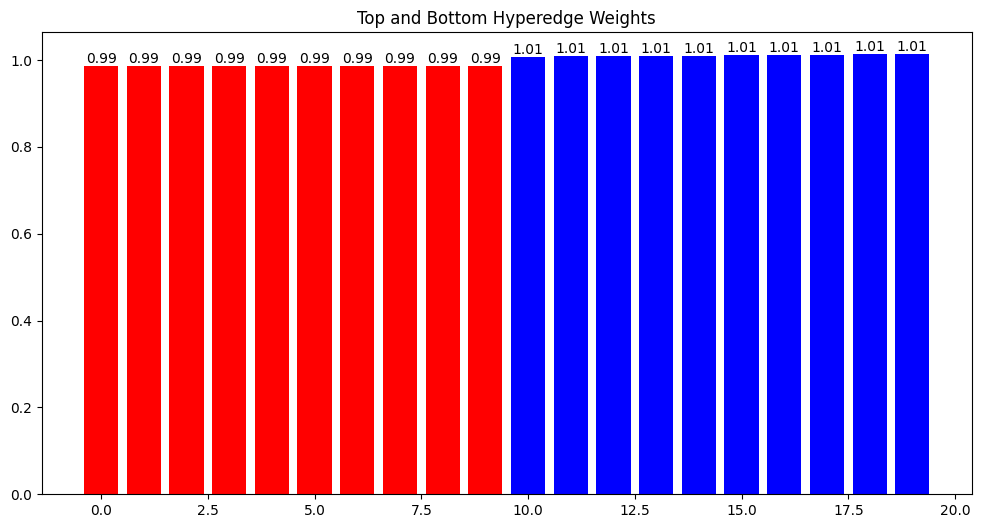

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def plot_top_and_bottom_node_weights(learned_weights, num_hyperedges=10):
    """Plot the top and bottom node weights based on their values."""
    # Sort the weights based on their values
    sorted_indices = np.argsort(learned_weights)

    # Extract the top and bottom node weights
    top_indices = sorted_indices[-num_hyperedges:]
    bottom_indices = sorted_indices[:num_hyperedges]

    # Combine the top and bottom indices and weights
    combined_indices = np.concatenate([bottom_indices, top_indices])
    combined_weights = learned_weights[combined_indices]

    # print top_indices and bottom_indices with their weights
    print('top_indices', learned_weights[top_indices])
    print('bottom_indices', learned_weights[bottom_indices])

    # Colors
    colors = ['red'] * num_hyperedges + ['blue'] * num_hyperedges

    # Plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(2*num_hyperedges), combined_weights, color=colors)

    # Annotate with the value of the node weight
    for i, weight in enumerate(combined_weights):
        plt.text(i, weight, f"{weight:.2f}",
                 ha='center', va='bottom' if weight > 0 else 'top')

    plt.axhline(0, color='black', linewidth=0.5)
    plt.title("Top and Bottom Hyperedge Weights")
    plt.show()


# Example usage:
# learned_weights = np.random.randn(400)
plot_top_and_bottom_node_weights(learned_weights, num_hyperedges=10)


In [16]:
# split the set of 3 into 2 classes based on labels
# take 1 subject from each class
# from the above imp. node list i have for asd, td: take 20 
# for these 2 subjects, 

(10,)

In [20]:
np.save('labels.npy', labels)

In [46]:
np.save('hyperedge_matrices.npy', hyperedge_matrices)

In [48]:
np.save('learned_weights.npy', learned_weights)

In [52]:
np.load('hyperedge_matrices.npy', allow_pickle=True).shape

(716, 400, 400)

In [24]:
labels = np.load('labels.npy', allow_pickle=True)
print(labels[:2])

[0. 1.]


In [31]:
# subject 0 is asd, subject 1 is td
hyperedge_matrices = np.load('hyperedge_matrices.npy', allow_pickle=True)
subject_0 = hyperedge_matrices[0]
subject_1 = hyperedge_matrices[1]

subject_0_imp_nodes = tup[0]
subject_1_imp_nodes = tup[1]

# find comman imp nodes between subject 0 and subject 1
common_imp_nodes = []
for node in subject_0_imp_nodes:
    if node in subject_1_imp_nodes:
        common_imp_nodes.append(node)


print(common_imp_nodes)


[]
